In [1]:
%matplotlib inline
!git pull
# import os;os.environ['LAMBDA_PARQUET_TICK_DB']=rf'X:\lambda_data'


Already up to date.


# Generation
Is generating running a backtest where the replay buffer is also going to save prices the time_horizon_seconds later to try to get a dataframe to get most important features.
Private  states are always included(inventory + score) so in the backtest the trades are not changing the results

In [2]:
from notebooks.lambda_imports import *

PROJECT_PATH=E:\javif\Coding\Python\market_making_fw\python_lambda
BACKTEST_OUTPUT_PATH(LAMBDA_OUTPUT_PATH)=X:\output_models
BACKTEST_TEMP_PATH(LAMBDA_TEMP_PATH)=E:\javif\Coding\Python\market_making_fw\java\temp;
BACKTEST_JAR_PATH(LAMBDA_JAR_PATH)=E:\javif\Coding\Python\market_making_fw\java\executables\Backtest\target\Backtest.jar
log_path(LAMBDA_LOGS_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\logs
PARQUET_PATH_DB(LAMBDA_PARQUET_TICK_DB)=X:\


In [4]:
columns_to_take_pct = 0.35
time_horizon_seconds=5
##
tick = TickDB()
instrument_pk='btcusdt_binance'

start_date=datetime.datetime(year=2022,month=1,day=24)#datetime.datetime.today()
testing_days=30
def get_time(reference_date,business_days,hour):
    from pandas.tseries.offsets import BDay
#     date=(reference_date-BDay(business_days))
    date=reference_date-datetime.timedelta(days = business_days)
    return datetime.datetime.fromtimestamp(date.timestamp()).replace(hour=hour, minute=0,second=0,microsecond=0)

start_date=get_time(start_date,testing_days+2,0)#datetime.datetime(year=2021, day=6, month=9,hour=0)
end_date=start_date

MARKET_MIDPRICE_RELATIVE=True
private_horizon_ticks=5#always included
market_horizon_ticks=10
candle_horizon=5

start_date

datetime.datetime(2022, 1, 7, 0, 0)

In [5]:
seed_number=28220
np.random.seed(seed_number)
import random
random.seed(seed_number)

In [6]:
from mlfinlab.feature_importance import single_feature_importance, mean_decrease_impurity, mean_decrease_accuracy, \
    plot_feature_importance, get_orthogonal_features, feature_pca_analysis


In [7]:
FILENAME = (BACKTEST_OUTPUT_PATH + '/ReplayBuffer_feature_importance_candles.csv')
session_filename='feature_importance.db'
GENERATE_FILE=True

In [8]:
# dill.load_session(session_filename)
depth_data = tick.get_depth(instrument_pk=instrument_pk,start_date=start_date,end_date=end_date)
trade_data = tick.get_trades(instrument_pk=instrument_pk,start_date=start_date,end_date=end_date)
candle_data = tick.get_candles_time(instrument_pk=instrument_pk,start_date=start_date,end_date=end_date)

downloading btcusdt_binance depth from 20220107 to 20220107
downloading btcusdt_binance trade from 20220107 to 20220107
downloading btcusdt_binance candle_time_MIN1 from 20220107 to 20220107


In [9]:
depth_data

,bidQuantity0,bidQuantity1,bidQuantity2,bidQuantity3,bidQuantity4,askQuantity0,askQuantity1,askQuantity2,askQuantity3,askQuantity4,bidPrice0,bidPrice1,bidPrice2,bidPrice3,bidPrice4,askPrice0,askPrice1,askPrice2,askPrice3,askPrice4,midprice,spread
date,,,,,,,,,,,,,,,,,,,,,,
2022-01-07 00:00:00.121,0.81377,0.00499,0.09052,0.18723,0.18550,0.18384,0.08114,0.20506,0.91376,0.17408,43082.30,43081.83,43081.82,43080.87,43080.86,43082.31,43086.61,43086.62,43090.88,43096.05,43082.305,0.01
2022-01-07 00:00:01.120,1.65546,0.00499,0.18571,0.17041,0.00213,0.45466,0.03122,0.08900,0.00227,0.00227,43082.30,43081.83,43080.87,43078.52,43077.70,43082.31,43086.61,43086.62,43089.98,43090.00,43082.305,0.01
2022-01-07 00:00:02.121,1.00636,0.00499,0.05803,0.19139,0.11605,0.06250,0.01632,0.04051,0.06099,0.11606,43082.30,43081.83,43081.68,43080.87,43080.56,43082.31,43082.49,43086.61,43088.80,43088.81,43082.305,0.01
2022-01-07 00:00:03.120,1.18270,0.09052,0.09666,0.09052,0.17041,0.06717,0.00142,0.00142,0.00227,0.27740,43082.30,43081.82,43080.87,43080.01,43078.52,43082.31,43091.00,43092.51,43093.00,43096.04,43082.305,0.01
2022-01-07 00:00:04.121,0.43810,0.17406,0.15582,0.44500,0.49750,1.22842,0.11605,0.12026,0.36063,0.09050,43093.02,43083.95,43083.59,43083.58,43082.52,43093.03,43093.04,43096.03,43096.04,43098.10,43093.025,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 23:59:42.015,0.25000,0.14790,2.15381,0.05462,0.72264,0.23888,0.18859,0.16922,0.78995,1.00000,41517.30,41517.11,41517.10,41514.46,41514.45,41519.94,41543.48,41547.77,41571.07,41584.03,41518.620,2.64
2022-01-07 23:59:43.013,1.71333,0.06434,0.25000,0.25000,0.43000,0.06467,0.18065,0.04833,0.05000,0.74700,41528.03,41527.47,41527.41,41527.37,41527.10,41531.89,41533.97,41536.76,41540.41,41542.01,41529.960,3.86
2022-01-07 23:59:44.012,0.16215,0.06434,0.12038,0.43000,1.35000,0.06467,0.20638,0.05000,0.06432,0.09391,41534.73,41532.38,41530.94,41530.30,41528.04,41535.91,41538.65,41541.45,41542.27,41542.28,41535.320,1.18


In [10]:
trade_data


,quantity,price
date,,
2022-01-07 00:00:00.000,0.00202,43082.30
2022-01-07 00:00:00.001,0.00188,43082.31
2022-01-07 00:00:00.002,0.00245,43082.31
2022-01-07 00:00:00.003,0.00188,43082.30
2022-01-07 00:00:00.004,0.00130,43082.31
...,...,...
2022-01-07 23:59:48.040,0.04023,41534.74
2022-01-07 23:59:48.382,0.00135,41534.73
2022-01-07 23:59:48.784,0.00001,41534.74


In [11]:
candle_data

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,date
datetime,,,,,,,,,,,
2022-01-07 00:01:00,1641513660,680,0.00202,1.74746,0.00001,0.00067,29275864.89,14443973.76,679,741534.222085,20220107
2022-01-07 00:02:00,1641513720,1165,0.00119,1.24605,0.00007,0.00126,20900565.04,10127046.69,485,597796.364374,20220107
2022-01-07 00:03:00,1641513780,1748,0.00021,1.90000,0.00001,0.00043,25136186.04,12029038.19,583,936088.494866,20220107
2022-01-07 00:04:00,1641513840,2197,0.00044,2.00200,0.00002,0.00037,19355189.30,9742220.25,449,721330.997502,20220107
2022-01-07 00:05:00,1641513900,2652,0.00063,1.71488,0.00001,0.00048,19602030.54,9994932.80,455,628875.861713,20220107
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 23:55:00,1641599700,542826,0.00181,1.05576,0.00001,0.00179,9918952.65,4689730.56,239,234863.732366,20220107
2022-01-07 23:56:00,1641599760,543085,0.00147,0.23999,0.00001,0.00135,10753964.81,5148651.14,259,162062.482169,20220107
2022-01-07 23:57:00,1641599820,543326,0.00147,1.28607,0.00001,0.00062,10012784.04,4694721.90,241,341885.154858,20220107


In [12]:
# import plotly.graph_objects as go

# candlestick = go.Candlestick(
#     x=candle_data.index,
#     open=candle_data['open'],
#     high=candle_data['high'],
#     low=candle_data['low'],
#     close=candle_data['close']
# )

# fig = go.Figure(data=[candlestick])
# fig.show()

In [13]:
columns_states = []

private_states=[]
market__depth_states = []
market__trade_states = []
candle_states = []
#   [inventory_2, inventory_1, inventory_0,
#   score_2, score_1, score_0,
for private_state_horizon in range(private_horizon_ticks-1,-1,-1):
    private_states.append('inventory_%d'%private_state_horizon)
    private_states.append('score_%d'%private_state_horizon)
    
for market_state_horizon in range(market_horizon_ticks-1,-1,-1):
    market__depth_states.append('bid_price_%d'%market_state_horizon)
    market__depth_states.append('ask_price_%d'%market_state_horizon)
    market__depth_states.append('bid_qty_%d'%market_state_horizon)
    market__depth_states.append('ask_qty_%d'%market_state_horizon)
    market__depth_states.append('spread_%d'%market_state_horizon)
    market__depth_states.append('midprice_%d'%market_state_horizon)
    market__depth_states.append('microprice_%d'%market_state_horizon)
    market__trade_states.append('last_close_price_%d'%market_state_horizon)
    market__trade_states.append('last_close_qty_%d'%market_state_horizon)
for candle_state_horizon in range(candle_horizon-1,-1,-1):
  if not MARKET_MIDPRICE_RELATIVE:
    candle_states.append('open_%d'%candle_state_horizon)
  candle_states.append('high_%d'%candle_state_horizon)
  candle_states.append('low_%d'%candle_state_horizon)
  candle_states.append('close_%d'%candle_state_horizon)
candle_states.append('ma')
candle_states.append('std')
candle_states.append('max')
candle_states.append('min')



future_columns = ['future_midprice', 'future_askprice', 'future_bidprice']

columns_states=private_states+market__depth_states+market__trade_states+candle_states
columns_states += future_columns

In [14]:
# MARKET_MIDPRICE_RELATIVE
depth_data['spread']=abs(depth_data['bidPrice0']-depth_data['askPrice0'])
depth_data['midprice']=(depth_data['bidPrice0']+depth_data['askPrice0'])/2
depth_data['microprice']=get_microprice(depth_data)
depth_data['imbalance']=get_imbalance(depth_data,max_depth=5)

if MARKET_MIDPRICE_RELATIVE:
    depth_data['bidPrice0']=abs(depth_data['bidPrice0']-depth_data['midprice'])
    depth_data['askPrice0']=abs(depth_data['askPrice0']-depth_data['midprice'])
    depth_data['microprice']=abs(depth_data['microprice']-depth_data['midprice'])

for lag in range(market_horizon_ticks):
    depth_data['bid_price_%d'%lag]=depth_data['bidPrice0'].shift(lag)
    depth_data['ask_price_%d'%lag]=depth_data['askPrice0'].shift(lag)
    depth_data['bid_qty_%d'%lag]=depth_data['bidQuantity0'].shift(lag)
    depth_data['ask_qty_%d'%lag]=depth_data['askQuantity0'].shift(lag)
    depth_data['spread_%d'%lag]=depth_data['spread'].shift(lag)
    depth_data['midprice_%d'%lag]=depth_data['midprice'].shift(lag)
    depth_data['microprice_%d'%lag]=depth_data['microprice'].shift(lag)

depth_data.tail()

,bidQuantity0,bidQuantity1,bidQuantity2,bidQuantity3,bidQuantity4,askQuantity0,askQuantity1,askQuantity2,askQuantity3,askQuantity4,bidPrice0,bidPrice1,bidPrice2,bidPrice3,bidPrice4,askPrice0,askPrice1,askPrice2,askPrice3,askPrice4,midprice,spread,microprice,imbalance,bid_price_0,...,ask_qty_6,spread_6,midprice_6,microprice_6,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-07 23:59:42.015,3.32897,0.14790,2.15381,0.05462,0.72264,2.38664,0.18859,0.16922,0.78995,1.00000,1.320,41517.11,41517.10,41514.46,41514.45,1.320,41543.48,41547.77,41571.07,41584.03,41518.620,2.64,0.030025,0.164870,1.320,...,1.09879,1.76,41516.230,0.877754,0.005,0.005,0.40764,1.25886,0.01,41517.105,0.004377,2.085,2.085,1.18588,1.60996,4.17,41515.025,1.846961,0.005,0.005,0.64573,1.78451,0.01,41517.105,0.004600
2022-01-07 23:59:43.013,2.70767,0.06434,0.25000,0.25000,0.43000,1.09065,0.18065,0.04833,0.05000,0.74700,1.930,41527.47,41527.41,41527.37,41527.10,1.930,41533.97,41536.76,41540.41,41542.01,41529.960,3.86,1.789603,0.425720,1.930,...,0.99531,0.01,41517.105,0.004262,0.880,0.880,0.40531,1.09879,1.76,41516.230,0.877754,0.005,0.005,0.40764,1.25886,0.01,41517.105,0.004377,2.085,2.085,1.18588,1.60996,4.17,41515.025,1.846961
2022-01-07 23:59:44.012,2.12687,0.06434,0.12038,0.43000,1.35000,0.47928,0.20638,0.05000,0.06432,0.09391,0.590,41532.38,41530.94,41530.30,41528.04,0.590,41538.65,41541.45,41542.27,41542.28,41535.320,1.18,0.253563,0.632193,0.590,...,2.36970,0.01,41517.105,0.004366,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.880,0.880,0.40531,1.09879,1.76,41516.230,0.877754,0.005,0.005,0.40764,1.25886,0.01,41517.105,0.004377
2022-01-07 23:59:45.012,0.79006,0.01585,0.00100,0.18058,0.43048,0.44810,0.01585,0.08600,0.06020,0.02000,0.005,41534.53,41532.98,41532.84,41530.30,0.005,41536.26,41538.65,41539.91,41541.00,41534.735,0.01,0.001213,0.276184,0.005,...,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.880,0.880,0.40531,1.09879,1.76,41516.230,0.877754
2022-01-07 23:59:46.012,1.00784,0.43048,0.09390,0.06235,0.18059,1.16972,0.02000,0.06235,0.88100,0.12037,1.960,41530.30,41528.05,41526.74,41524.50,1.960,41541.00,41542.27,41550.51,41558.32,41536.690,3.92,0.927536,-0.074340,1.960,...,1.67612,0.01,41517.105,0.004633,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262


In [ ]:
depth_data.head()

In [15]:
depth_data.shape

(86068, 94)

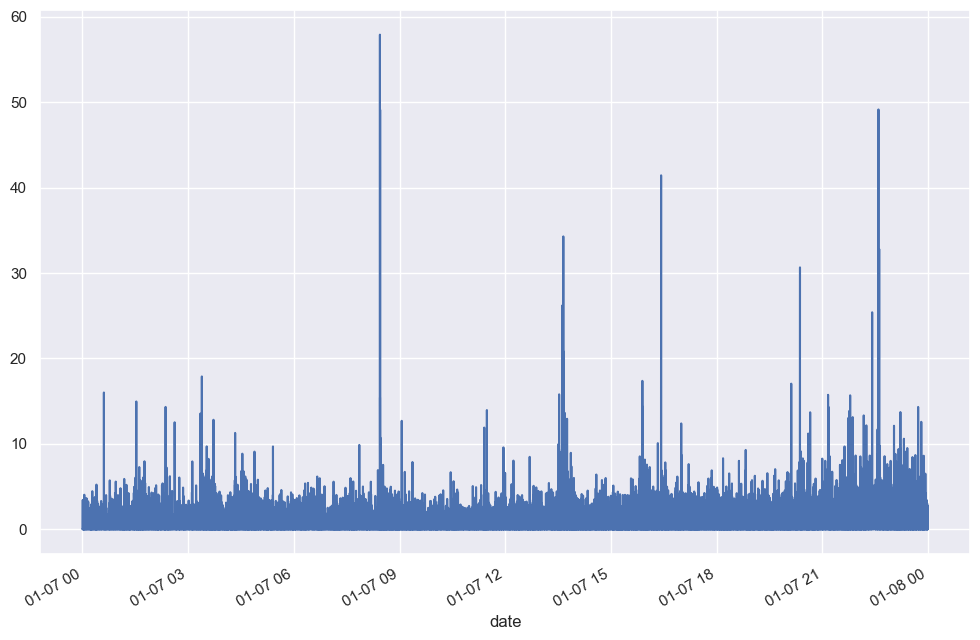

In [16]:
depth_data['ask_price_1'].plot()
plt.show()

In [17]:
#add future
future_df=pd.DataFrame(columns=future_columns)
future_df['future_midprice']=copy.copy(depth_data['midprice'].shift(periods=-time_horizon_seconds,freq="S"))
future_df['future_askprice']=copy.copy(depth_data['askPrice0'].shift(periods=-time_horizon_seconds,freq="S"))
future_df['future_bidprice']=copy.copy(depth_data['bidPrice0'].shift(periods=-time_horizon_seconds,freq="S"))

future_df.head()

,future_midprice,future_askprice,future_bidprice
date,,,
2022-01-06 23:59:55.121,43082.305,0.005,0.005
2022-01-06 23:59:56.120,43082.305,0.005,0.005
2022-01-06 23:59:57.121,43082.305,0.005,0.005
2022-01-06 23:59:58.120,43082.305,0.005,0.005
2022-01-06 23:59:59.121,43093.025,0.005,0.005


In [18]:
for lag in range(market_horizon_ticks):
    trade_data['last_close_price_%d'%lag]=trade_data['price'].shift(lag)
    trade_data['last_close_qty_%d'%lag]=trade_data['quantity'].shift(lag)

In [19]:
MARKET_MIDPRICE_RELATIVE

True

In [20]:
import copy
candle_data_2 = copy.copy(candle_data)
if MARKET_MIDPRICE_RELATIVE:    
    candle_data_2['close']=(candle_data_2['close']/candle_data_2['open'])-1.0
    candle_data_2['low']=(candle_data_2['low']/candle_data_2['open'])-1.
    candle_data_2['high']=(candle_data_2['high']/candle_data_2['open'])-1.
    candle_data_2.drop(columns=['open'],inplace=True)
    
    
for lag in range(candle_horizon):
#     candle_data['open_%d'%lag]=candle_data['price_open'].shift(lag)
    candle_data_2['close_%d'%lag]=candle_data_2['close'].shift(lag)
    candle_data_2['low_%d'%lag]=candle_data_2['low'].shift(lag)
    candle_data_2['high_%d'%lag]=candle_data_2['high'].shift(lag)

candle_data_2['ma'] = candle_data_2['close'].rolling(window=candle_horizon).mean()
candle_data_2['std'] = candle_data_2['close'].rolling(window=candle_horizon).std()
candle_data_2['max'] = candle_data_2['high'].rolling(window=candle_horizon).max()
candle_data_2['min'] = candle_data_2['low'].rolling(window=candle_horizon).min()
candle_data_2.tail(15)

,date_time,tick_num,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,date,close_0,low_0,high_0,close_1,low_1,high_1,close_2,low_2,high_2,close_3,low_3,high_3,close_4,low_4,high_4,ma,std,max,min
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-07 23:45:00,1641599100,539915,503.072327,-0.996855,-0.562893,9104762.80,4448433.82,219,236454.563137,20220107,-0.562893,-0.996855,503.072327,-0.166667,-0.993056,216.402778,2.783333,-0.566667,2869.000000,-0.531429,-0.857143,540.800000,-0.939776,-0.997199,320.710084,0.116514,1.515692,2869.000000,-0.997199
2022-01-07 23:46:00,1641599160,540307,2305.909091,-0.431818,11.613636,16282023.25,7850404.28,392,499761.013219,20220107,11.613636,-0.431818,2305.909091,-0.562893,-0.996855,503.072327,-0.166667,-0.993056,216.402778,2.783333,-0.566667,2869.000000,-0.531429,-0.857143,540.800000,2.627196,5.213917,2869.000000,-0.996855
2022-01-07 23:47:00,1641599220,540540,226.053892,-0.994012,-0.473054,9680100.08,4653156.65,233,161311.704092,20220107,-0.473054,-0.994012,226.053892,11.613636,-0.431818,2305.909091,-0.562893,-0.996855,503.072327,-0.166667,-0.993056,216.402778,2.783333,-0.566667,2869.000000,2.638871,5.205134,2869.000000,-0.996855
2022-01-07 23:48:00,1641599280,540760,162.099593,-0.997967,-0.794715,9142337.06,4197287.98,220,203230.150360,20220107,-0.794715,-0.997967,162.099593,-0.473054,-0.994012,226.053892,11.613636,-0.431818,2305.909091,-0.562893,-0.996855,503.072327,-0.166667,-0.993056,216.402778,1.923261,5.421758,2305.909091,-0.997967
2022-01-07 23:49:00,1641599340,541166,3124.000000,-0.993421,4.296053,16847755.30,8008904.20,406,688530.214946,20220107,4.296053,-0.993421,3124.000000,-0.794715,-0.997967,162.099593,-0.473054,-0.994012,226.053892,11.613636,-0.431818,2305.909091,-0.562893,-0.996855,503.072327,2.815805,5.358662,3124.000000,-0.997967
2022-01-07 23:50:00,1641599400,541533,436.477273,-0.988636,0.511364,15213459.78,7130033.37,367,287371.224153,20220107,0.511364,-0.988636,436.477273,4.296053,-0.993421,3124.000000,-0.794715,-0.997967,162.099593,-0.473054,-0.994012,226.053892,11.613636,-0.431818,2305.909091,3.030657,5.208768,3124.000000,-0.997967
2022-01-07 23:51:00,1641599460,541838,707.558824,-0.985294,-0.382353,12647042.38,6385736.59,305,300061.254466,20220107,-0.382353,-0.985294,707.558824,0.511364,-0.988636,436.477273,4.296053,-0.993421,3124.000000,-0.794715,-0.997967,162.099593,-0.473054,-0.994012,226.053892,0.631459,2.105078,3124.000000,-0.997967
2022-01-07 23:52:00,1641599520,542056,709.725000,-0.987500,2.150000,9039637.85,4644159.13,218,186954.036766,20220107,2.150000,-0.987500,709.725000,-0.382353,-0.985294,707.558824,0.511364,-0.988636,436.477273,4.296053,-0.993421,3124.000000,-0.794715,-0.997967,162.099593,1.156070,2.087783,3124.000000,-0.997967
2022-01-07 23:53:00,1641599580,542288,148.720000,-0.996667,-0.893333,9620983.58,4810523.98,232,203625.822379,20220107,-0.893333,-0.996667,148.720000,2.150000,-0.987500,709.725000,-0.382353,-0.985294,707.558824,0.511364,-0.988636,436.477273,4.296053,-0.993421,3124.000000,1.136346,2.111154,3124.000000,-0.996667


In [21]:
depth_data_2 = depth_data[market__depth_states]
trade_data_2 = trade_data[market__trade_states]
candle_data_3 = candle_data_2[candle_states]
future_data_2 = future_df[future_columns]

In [22]:
future_data_2.head()

,future_midprice,future_askprice,future_bidprice
date,,,
2022-01-06 23:59:55.121,43082.305,0.005,0.005
2022-01-06 23:59:56.120,43082.305,0.005,0.005
2022-01-06 23:59:57.121,43082.305,0.005,0.005
2022-01-06 23:59:58.120,43082.305,0.005,0.005
2022-01-06 23:59:59.121,43093.025,0.005,0.005


In [23]:
output_data=pd.concat([depth_data_2,trade_data_2,candle_data_3,future_data_2])
output_data.sort_index(inplace=True)

output_data.fillna(method='ffill',inplace=True,axis=0)
output_data.dropna(inplace=True)
output_data[['midprice_0','future_midprice']]

,midprice_0,future_midprice
2022-01-07 00:05:00.000,43071.865,43075.185
2022-01-07 00:05:00.001,43071.865,43075.185
2022-01-07 00:05:00.002,43071.865,43075.185
2022-01-07 00:05:00.006,43071.865,43075.185
2022-01-07 00:05:00.007,43071.865,43075.185
...,...,...
2022-01-07 23:59:48.040,41536.690,41536.690
2022-01-07 23:59:48.382,41536.690,41536.690
2022-01-07 23:59:48.784,41536.690,41536.690
2022-01-07 23:59:48.808,41536.690,41536.690


In [24]:
output_data.describe()

,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_6,ask_price_6,bid_qty_6,ask_qty_6,...,last_close_qty_1,last_close_price_0,last_close_qty_0,high_4,low_4,close_4,high_3,low_3,close_3,high_2,low_2,close_2,high_1,low_1,close_1,high_0,low_0,close_0,ma,std,max,min,future_midprice,future_askprice,future_bidprice
count,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,...,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000
mean,0.462212,0.462212,1.478882,1.317640,0.924423,42024.314016,0.295543,0.463141,0.463141,1.493846,1.314569,0.926283,42024.516102,0.298143,0.478447,0.478447,1.472641,1.316238,0.956893,42024.726037,0.312042,0.486062,0.486062,1.522094,1.323558,...,0.031036,42054.445330,0.029926,1652.070239,-0.942095,1.565791,1691.664421,-0.944883,1.431210,1699.524264,-0.943981,1.859958,2051.666650,-0.944239,1.740791,2249.613401,-0.943625,2.047193,1.728989,3.631588,4887.416424,-0.994650,42025.507239,0.511207,0.511207
std,1.698906,1.698906,6.406673,2.413324,3.397811,501.181693,1.311779,1.760993,1.760993,6.988543,2.401361,3.521986,501.237122,1.390225,1.866910,1.866910,6.512470,2.441168,3.733820,501.154033,1.540190,1.886808,1.886808,7.362917,2.465598,...,0.125154,498.874893,0.124871,3012.964549,0.124508,9.023028,3342.609735,0.122267,8.861819,3292.363088,0.121225,10.393747,3619.230607,0.120931,9.898584,4027.622633,0.122035,11.081745,4.757200,8.987341,6432.421557,0.003629,500.136835,1.943646,1.943646
min,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,...,0.000010,40610.000000,0.000010,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,-0.726254,0.095080,257.688312,-0.999980,40621.570000,0.005000,0.005000
25%,0.005000,0.005000,0.529280,0.514190,0.010000,41656.565000,0.002071,0.005000,0.005000,0.530710,0.511240,0.010000,41656.522500,0.002059,0.005000,0.005000,0.530110,0.509690,0.010000,41656.395000,0.002080,0.005000,0.005000,0.529935,0.509920,...,0.001240,41672.315000,0.001230,390.868421,-0.993289,-0.528571,392.731544,-0.993243,-0.535885,399.882943,-0.993243,-0.535211,399.882943,-0.993243,-0.508772,412.016529,-0.993289,-0.508772,0.072837,0.782880,1537.461538,-0.996979,41654.960000,0.005000,0.005000
50%,0.005000,0.005000,0.926120,0.890060,0.010000,41925.445000,0.004122,0.005000,0.005000,0.925740,0.888640,0.010000,41925.675000,0.004111,0.005000,0.005000,0.925180,0.886450,0.010000,41925.985000,0.004138,0.005000,0.005000,0.927940,0.888640,...,0.005820,41976.320000,0.005850,852.008753,-0.985714,0.034188,793.413793,-0.987952,0.009615,797.994975,-0.985714,0.030303,884.319527,-0.985714,0.056338,925.347826,-0.985714,0.034188,0.559686,1.367036,2886.659091,-0.995413,41925.835000,0.005000,0.005000
75%,0.005000,0.005000,1.622580,1.548970,0.010000,42376.985000,0.004998,0.005000,0.005000,1.618380,1.543200,0.010000,42376.985000,0.004997,0.005000,0.005000,1.617140,1.546770,0.010000,42377.385000,0.004998,0.005000,0.005000,1.624615,1.544890,...,0.026340,42417.330000,0.020000,1872.984496,-0.966667,1.000000,

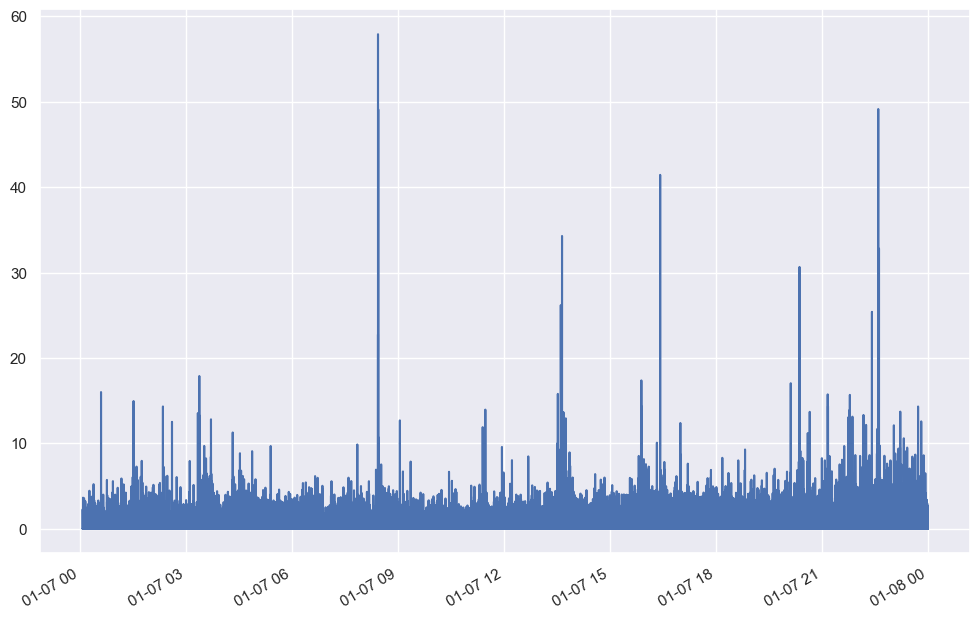

In [25]:
output_data['bid_price_0'].plot()

In [26]:
if GENERATE_FILE:
    output_data.to_csv(FILENAME)

In [27]:
output_data.columns

Index(['bid_price_9', 'ask_price_9', 'bid_qty_9', 'ask_qty_9', 'spread_9',
       'midprice_9', 'microprice_9', 'bid_price_8', 'ask_price_8', 'bid_qty_8',
       ...
       'high_0', 'low_0', 'close_0', 'ma', 'std', 'max', 'min',
       'future_midprice', 'future_askprice', 'future_bidprice'],
      dtype='object', length=112)

# Feature Importance

In [28]:
filename = FILENAME  # (models_path + '/ReplayBufferPrinterAlgo_ethbtc_replaybuffer.csv')
if not GENERATE_FILE:
    output_data = pd.read_csv(FILENAME, index_col=0)
output_data.describe()


,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_6,ask_price_6,bid_qty_6,ask_qty_6,...,last_close_qty_1,last_close_price_0,last_close_qty_0,high_4,low_4,close_4,high_3,low_3,close_3,high_2,low_2,close_2,high_1,low_1,close_1,high_0,low_0,close_0,ma,std,max,min,future_midprice,future_askprice,future_bidprice
count,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,...,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000
mean,0.462212,0.462212,1.478882,1.317640,0.924423,42024.314016,0.295543,0.463141,0.463141,1.493846,1.314569,0.926283,42024.516102,0.298143,0.478447,0.478447,1.472641,1.316238,0.956893,42024.726037,0.312042,0.486062,0.486062,1.522094,1.323558,...,0.031036,42054.445330,0.029926,1652.070239,-0.942095,1.565791,1691.664421,-0.944883,1.431210,1699.524264,-0.943981,1.859958,2051.666650,-0.944239,1.740791,2249.613401,-0.943625,2.047193,1.728989,3.631588,4887.416424,-0.994650,42025.507239,0.511207,0.511207
std,1.698906,1.698906,6.406673,2.413324,3.397811,501.181693,1.311779,1.760993,1.760993,6.988543,2.401361,3.521986,501.237122,1.390225,1.866910,1.866910,6.512470,2.441168,3.733820,501.154033,1.540190,1.886808,1.886808,7.362917,2.465598,...,0.125154,498.874893,0.124871,3012.964549,0.124508,9.023028,3342.609735,0.122267,8.861819,3292.363088,0.121225,10.393747,3619.230607,0.120931,9.898584,4027.622633,0.122035,11.081745,4.757200,8.987341,6432.421557,0.003629,500.136835,1.943646,1.943646
min,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,...,0.000010,40610.000000,0.000010,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,-0.726254,0.095080,257.688312,-0.999980,40621.570000,0.005000,0.005000
25%,0.005000,0.005000,0.529280,0.514190,0.010000,41656.565000,0.002071,0.005000,0.005000,0.530710,0.511240,0.010000,41656.522500,0.002059,0.005000,0.005000,0.530110,0.509690,0.010000,41656.395000,0.002080,0.005000,0.005000,0.529935,0.509920,...,0.001240,41672.315000,0.001230,390.868421,-0.993289,-0.528571,392.731544,-0.993243,-0.535885,399.882943,-0.993243,-0.535211,399.882943,-0.993243,-0.508772,412.016529,-0.993289,-0.508772,0.072837,0.782880,1537.461538,-0.996979,41654.960000,0.005000,0.005000
50%,0.005000,0.005000,0.926120,0.890060,0.010000,41925.445000,0.004122,0.005000,0.005000,0.925740,0.888640,0.010000,41925.675000,0.004111,0.005000,0.005000,0.925180,0.886450,0.010000,41925.985000,0.004138,0.005000,0.005000,0.927940,0.888640,...,0.005820,41976.320000,0.005850,852.008753,-0.985714,0.034188,793.413793,-0.987952,0.009615,797.994975,-0.985714,0.030303,884.319527,-0.985714,0.056338,925.347826,-0.985714,0.034188,0.559686,1.367036,2886.659091,-0.995413,41925.835000,0.005000,0.005000
75%,0.005000,0.005000,1.622580,1.548970,0.010000,42376.985000,0.004998,0.005000,0.005000,1.618380,1.543200,0.010000,42376.985000,0.004997,0.005000,0.005000,1.617140,1.546770,0.010000,42377.385000,0.004998,0.005000,0.005000,1.624615,1.544890,...,0.026340,42417.330000,0.020000,1872.984496,-0.966667,1.000000,

In [29]:
dill.dump_session(session_filename)


In [30]:

assert len(output_data.columns)==len(columns_states)-len(private_states)
output_data.columns

Index(['bid_price_9', 'ask_price_9', 'bid_qty_9', 'ask_qty_9', 'spread_9',
       'midprice_9', 'microprice_9', 'bid_price_8', 'ask_price_8', 'bid_qty_8',
       ...
       'high_0', 'low_0', 'close_0', 'ma', 'std', 'max', 'min',
       'future_midprice', 'future_askprice', 'future_bidprice'],
      dtype='object', length=112)

In [31]:
output_data[['future_midprice','midprice_0']]

,future_midprice,midprice_0
2022-01-07 00:05:00.000,43075.185,43071.865
2022-01-07 00:05:00.001,43075.185,43071.865
2022-01-07 00:05:00.002,43075.185,43071.865
2022-01-07 00:05:00.006,43075.185,43071.865
2022-01-07 00:05:00.007,43075.185,43071.865
...,...,...
2022-01-07 23:59:48.040,41536.690,41536.690
2022-01-07 23:59:48.382,41536.690,41536.690
2022-01-07 23:59:48.784,41536.690,41536.690
2022-01-07 23:59:48.808,41536.690,41536.690


In [32]:
output_data['midprice_diff_future'] = output_data['future_midprice'] - output_data['midprice_0']
output_data['target'] = output_data['midprice_diff_future'] > 0
df=output_data

## Private

In [33]:
# df[state.get_private_columns()].describe()

## Market

In [34]:
df[market__depth_states+market__trade_states].describe()

,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_6,ask_price_6,bid_qty_6,ask_qty_6,...,bid_qty_0,ask_qty_0,spread_0,midprice_0,microprice_0,last_close_price_9,last_close_qty_9,last_close_price_8,last_close_qty_8,last_close_price_7,last_close_qty_7,last_close_price_6,last_close_qty_6,last_close_price_5,last_close_qty_5,last_close_price_4,last_close_qty_4,last_close_price_3,last_close_qty_3,last_close_price_2,last_close_qty_2,last_close_price_1,last_close_qty_1,last_close_price_0,last_close_qty_0
count,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,...,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000
mean,0.462212,0.462212,1.478882,1.317640,0.924423,42024.314016,0.295543,0.463141,0.463141,1.493846,1.314569,0.926283,42024.516102,0.298143,0.478447,0.478447,1.472641,1.316238,0.956893,42024.726037,0.312042,0.486062,0.486062,1.522094,1.323558,...,1.542689,1.355807,1.132791,42025.828960,0.366386,42054.530121,0.030985,42054.238937,0.032139,42054.329538,0.031682,42054.302071,0.031640,42054.299513,0.030727,42054.034029,0.032032,42054.281384,0.030971,42054.333377,0.031220,42054.336657,0.031036,42054.445330,0.029926
std,1.698906,1.698906,6.406673,2.413324,3.397811,501.181693,1.311779,1.760993,1.760993,6.988543,2.401361,3.521986,501.237122,1.390225,1.866910,1.866910,6.512470,2.441168,3.733820,501.154033,1.540190,1.886808,1.886808,7.362917,2.465598,...,6.940348,2.464364,4.475854,500.583017,1.736896,498.875749,0.130618,498.670536,0.129798,499.010506,0.128133,499.030135,0.126454,499.026275,0.127509,498.842286,0.126525,499.036853,0.127494,498.791614,0.125694,498.787592,0.125154,498.874893,0.124871
min,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,0.010000,40621.570000,0.000000,0.005000,0.005000,0.002880,0.006750,...,0.002880,0.006750,0.010000,40621.570000,0.000000,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010,40610.000000,0.000010
25%,0.005000,0.005000,0.529280,0.514190,0.010000,41656.565000,0.002071,0.005000,0.005000,0.530710,0.511240,0.010000,41656.522500,0.002059,0.005000,0.005000,0.530110,0.509690,0.010000,41656.395000,0.002080,0.005000,0.005000,0.529935,0.509920,...,0.534040,0.514770,0.010000,41656.645000,0.002125,41672.440000,0.001260,41672.350000,0.001230,41672.330000,0.001260,41672.350000,0.001260,41672.310000,0.001260,41672.320000,0.001260,41672.310000,0.001250,41672.300000,0.001250,41672.325000,0.001240,41672.315000,0.001230
50%,0.005000,0.005000,0.926120,0.890060,0.010000,41925.445000,0.004122,0.005000,0.005000,0.925740,0.888640,0.010000,41925.675000,0.004111,0.005000,0.005000,0.925180,0.886450,0.010000,41925.985000,0.004138,0.005000,0.005000,0.927940,0.888640,...,0.945360,0.896560,0.010000,41926.570000,0.004202,41976.320000,0.004910,41976.340000,0.005900,41976.330000,0.004830,41976.350000,0.005990,41976.330000,0.005600,41976.330000,0.005990,41976.330000,0.005950,41976.320000,0.005850,41976.330000,0.005820,41976.320000,0.005850
75%,0.005000,0.005000,1.622580,1.548970,0.010000,42376

## Candles

In [35]:
df[candle_states].describe()

,high_4,low_4,close_4,high_3,low_3,close_3,high_2,low_2,close_2,high_1,low_1,close_1,high_0,low_0,close_0,ma,std,max,min
count,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000,714023.000000
mean,1652.070239,-0.942095,1.565791,1691.664421,-0.944883,1.431210,1699.524264,-0.943981,1.859958,2051.666650,-0.944239,1.740791,2249.613401,-0.943625,2.047193,1.728989,3.631588,4887.416424,-0.994650
std,3012.964549,0.124508,9.023028,3342.609735,0.122267,8.861819,3292.363088,0.121225,10.393747,3619.230607,0.120931,9.898584,4027.622633,0.122035,11.081745,4.757200,8.987341,6432.421557,0.003629
min,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,0.071420,-0.999980,-0.998760,-0.726254,0.095080,257.688312,-0.999980
25%,390.868421,-0.993289,-0.528571,392.731544,-0.993243,-0.535885,399.882943,-0.993243,-0.535211,399.882943,-0.993243,-0.508772,412.016529,-0.993289,-0.508772,0.072837,0.782880,1537.461538,-0.996979
50%,852.008753,-0.985714,0.034188,793.413793,-0.987952,0.009615,797.994975,-0.985714,0.030303,884.319527,-0.985714,0.056338,925.347826,-0.985714,0.034188,0.559686,1.367036,2886.659091,-0.995413
75%,1872.984496,-0.966667,1.000000,1822.529412,-0.967742,0.950495,1784.750000,-0.960000,1.301370,2150.724138,-0.960000,1.413793,2310.517857,-0.965517,1.434783,1.687858,2.622011,5180.055556,-0.992647
max,49999.000000,0.000000,161.517241,49999.000000,0.000000,161.517241,49999.000000,0.000000,161.517241,49999.000000,0.000000,161.517241,49999.000000,0.000000,161.517241,58.373854,79.396818,49999.000000,-0.950959


In [36]:
columns_X = list(df.columns[:-7])
X_input = df[columns_X]
y_input = df['target']

In [37]:
y_input.sum()

336470

In [38]:
#Parameter tuning
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
best_model_params=None
split_iloc=int(len(X_input)*0.7)

X_input_parameter=X_input.replace([np.inf, -np.inf], np.nan)
X_input_parameter=X_input_parameter.dropna()

X_train_parameter = X_input.iloc[:split_iloc]
X_test_parameter = X_input.iloc[split_iloc:]
y_train_parameter = y_input.iloc[:split_iloc]
y_test_parameter=  y_input.iloc[split_iloc:]

max_depths=[5,7,10,12,15]
n_estimators=[1,3,5,7,10,20]
best_score_test=-999999
for max_depth in tqdm(max_depths):
    for n_estimator in n_estimators:
        base_est_iter = RandomForestClassifier(n_estimators=n_estimator, criterion='entropy', bootstrap=False,
                                  class_weight='balanced_subsample',n_jobs=-5,max_depth=max_depth)
        base_est_iter.fit(X_train_parameter, y_train_parameter)
        score_test=base_est_iter.score(X_test_parameter,y_test_parameter)
        
        if score_test>best_score_test:
            best_score_test=score_test
            best_depth =max_depth
            best_n_estimator=n_estimator            
            print(f'best params found with max_depth {best_depth} and n_estimator {best_n_estimator} and score test {score_test}')
        

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

best params found with max_depth 5 and n_estimator 1 and score test 0.46386906123516036
best params found with max_depth 5 and n_estimator 3 and score test 0.5155013608332127
best params found with max_depth 5 and n_estimator 10 and score test 0.5213835215469149


 40%|█████████████████████████████████▌                                                  | 2/5 [00:39<01:00, 20.25s/it]

best params found with max_depth 10 and n_estimator 1 and score test 0.5302767883402503


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:09<00:49, 24.65s/it]

best params found with max_depth 12 and n_estimator 3 and score test 0.5357201211911842


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:24<00:00, 28.96s/it]


In [39]:
# %%
print(f'best params found with max_depth {best_depth} and n_estimator {best_n_estimator}')
from sklearn.model_selection import KFold
cv_gen = KFold(n_splits=4)

from sklearn.ensemble import RandomForestClassifier

# base_est = RandomForestClassifier(n_estimators=1, criterion='entropy', bootstrap=False,
#                                   class_weight='balanced_subsample')
base_est = RandomForestClassifier(n_estimators=best_n_estimator, criterion='entropy', bootstrap=False,
                                  class_weight='balanced_subsample',n_jobs=-5,max_depth=best_depth)
# pca_orthog = PCA(n_components=200)

# X_train_orthog = pd.DataFrame(pca_orthog.fit_transform(X_train),index=X_train.index)
X_train_orthog = X_input
y_train = y_input


total_columns = X_train_orthog.shape[1]

columns_to_take_mdi = int(total_columns*columns_to_take_pct*0.25)
columns_to_take_mda = int(total_columns*columns_to_take_pct*0.25)
columns_to_take_sfi = int(total_columns*columns_to_take_pct*0.5)

best params found with max_depth 12 and n_estimator 3


In [40]:
X_train_orthog

,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_6,ask_price_6,bid_qty_6,ask_qty_6,...,last_close_price_3,last_close_qty_3,last_close_price_2,last_close_qty_2,last_close_price_1,last_close_qty_1,last_close_price_0,last_close_qty_0,high_4,low_4,close_4,high_3,low_3,close_3,high_2,low_2,close_2,high_1,low_1,close_1,high_0,low_0,close_0,ma,std
2022-01-07 00:05:00.000,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43070.03,0.00763,43071.87,0.00075,43071.87,0.00048,43071.87,0.00457,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.001,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00075,43071.87,0.00048,43071.87,0.00457,43070.03,0.00096,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.002,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00048,43071.87,0.00457,43070.03,0.00096,43070.03,0.00230,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.006,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00457,43070.03,0.00096,43070.03,0.00230,43070.03,0.00073,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.007,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43070.03,0.00096,43070.03,0.00230,43070.03,0.00073,43071.85,0.00066,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 23:59:48.040,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.56041,1.67612,...,41534.73,0.00763,41534.73,0.00370,41534.73,0.00083,41534.74,0.04023,582.292818,-0.994475,-0.011050,162.258503,-0.993197,-0.081633,873.877551,-0.993197,-0.578231,385.698347,-0.995868,-0.549587,144.318653,-0.998705,-0.893782,-0.422857,0.370132
2022-01-07 23:59:48.382,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.56041,1.67612,...,41534.73,0.00370,41534.73,0.00083,41534.74,0.04023,41534.73,0.00135,582.292818,-0.994475,-0.011050,162.258503,-0.993197,-0.081633,873.877551,-0.993197,-0.578231,385.698347,-0.995868,-0.549587,144.318653,-0.998705,-0.893782,-0.422857,0.370132
2022-01-07 23:59:48.784,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.0042

In [41]:
print('Initially we have %d columns_states that we are going to reduce to a maximun of %d columns'%(X_input.shape[1],columns_to_take_mdi+columns_to_take_mda+columns_to_take_sfi))

Initially we have 107 columns_states that we are going to reduce to a maximun of 36 columns


In [42]:
X_train_orthog=X_train_orthog.replace([np.inf, -np.inf], np.nan)
X_train_orthog=X_train_orthog.dropna()
X_train_orthog

,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_6,ask_price_6,bid_qty_6,ask_qty_6,...,last_close_price_3,last_close_qty_3,last_close_price_2,last_close_qty_2,last_close_price_1,last_close_qty_1,last_close_price_0,last_close_qty_0,high_4,low_4,close_4,high_3,low_3,close_3,high_2,low_2,close_2,high_1,low_1,close_1,high_0,low_0,close_0,ma,std
2022-01-07 00:05:00.000,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43070.03,0.00763,43071.87,0.00075,43071.87,0.00048,43071.87,0.00457,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.001,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00075,43071.87,0.00048,43071.87,0.00457,43070.03,0.00096,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.002,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00048,43071.87,0.00457,43070.03,0.00096,43070.03,0.00230,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.006,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00457,43070.03,0.00096,43070.03,0.00230,43070.03,0.00073,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.007,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43070.03,0.00096,43070.03,0.00230,43070.03,0.00073,43071.85,0.00066,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 23:59:48.040,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.56041,1.67612,...,41534.73,0.00763,41534.73,0.00370,41534.73,0.00083,41534.74,0.04023,582.292818,-0.994475,-0.011050,162.258503,-0.993197,-0.081633,873.877551,-0.993197,-0.578231,385.698347,-0.995868,-0.549587,144.318653,-0.998705,-0.893782,-0.422857,0.370132
2022-01-07 23:59:48.382,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.56041,1.67612,...,41534.73,0.00370,41534.73,0.00083,41534.74,0.04023,41534.73,0.00135,582.292818,-0.994475,-0.011050,162.258503,-0.993197,-0.081633,873.877551,-0.993197,-0.578231,385.698347,-0.995868,-0.549587,144.318653,-0.998705,-0.893782,-0.422857,0.370132
2022-01-07 23:59:48.784,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.0042

In [43]:
X_train_orthog.replace([np.inf, -np.inf], np.nan)

,bid_price_9,ask_price_9,bid_qty_9,ask_qty_9,spread_9,midprice_9,microprice_9,bid_price_8,ask_price_8,bid_qty_8,ask_qty_8,spread_8,midprice_8,microprice_8,bid_price_7,ask_price_7,bid_qty_7,ask_qty_7,spread_7,midprice_7,microprice_7,bid_price_6,ask_price_6,bid_qty_6,ask_qty_6,...,last_close_price_3,last_close_qty_3,last_close_price_2,last_close_qty_2,last_close_price_1,last_close_qty_1,last_close_price_0,last_close_qty_0,high_4,low_4,close_4,high_3,low_3,close_3,high_2,low_2,close_2,high_1,low_1,close_1,high_0,low_0,close_0,ma,std
2022-01-07 00:05:00.000,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43070.03,0.00763,43071.87,0.00075,43071.87,0.00048,43071.87,0.00457,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.001,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00075,43071.87,0.00048,43071.87,0.00457,43070.03,0.00096,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.002,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00048,43071.87,0.00457,43070.03,0.00096,43070.03,0.00230,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.006,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43071.87,0.00457,43070.03,0.00096,43070.03,0.00230,43070.03,0.00073,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
2022-01-07 00:05:00.007,0.005,0.005,0.24558,1.27112,0.01,43075.005,0.005000,0.005,0.005,0.96937,1.26053,0.01,43071.905,0.001463,0.005,0.005,1.31560,0.32844,0.01,43070.005,0.004758,0.005,0.005,0.33495,1.10482,...,43070.03,0.00096,43070.03,0.00230,43070.03,0.00073,43071.85,0.00066,864.079208,-0.995050,-0.668317,1046.100840,-0.941176,0.058824,9046.619048,-0.952381,1.047619,4549.000000,-0.954545,-0.159091,2721.031746,-0.984127,-0.238095,0.008188,0.638216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 23:59:48.040,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.56041,1.67612,...,41534.73,0.00763,41534.73,0.00370,41534.73,0.00083,41534.74,0.04023,582.292818,-0.994475,-0.011050,162.258503,-0.993197,-0.081633,873.877551,-0.993197,-0.578231,385.698347,-0.995868,-0.549587,144.318653,-0.998705,-0.893782,-0.422857,0.370132
2022-01-07 23:59:48.382,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.004262,0.005,0.005,0.97543,2.36970,0.01,41517.105,0.004366,1.700,1.700,0.25473,1.49603,3.40,41515.410,1.413568,0.005,0.005,0.56041,1.67612,...,41534.73,0.00370,41534.73,0.00083,41534.74,0.04023,41534.73,0.00135,582.292818,-0.994475,-0.011050,162.258503,-0.993197,-0.081633,873.877551,-0.993197,-0.578231,385.698347,-0.995868,-0.549587,144.318653,-0.998705,-0.893782,-0.422857,0.370132
2022-01-07 23:59:48.784,0.005,0.005,0.55325,0.99531,0.01,41517.105,0.0042

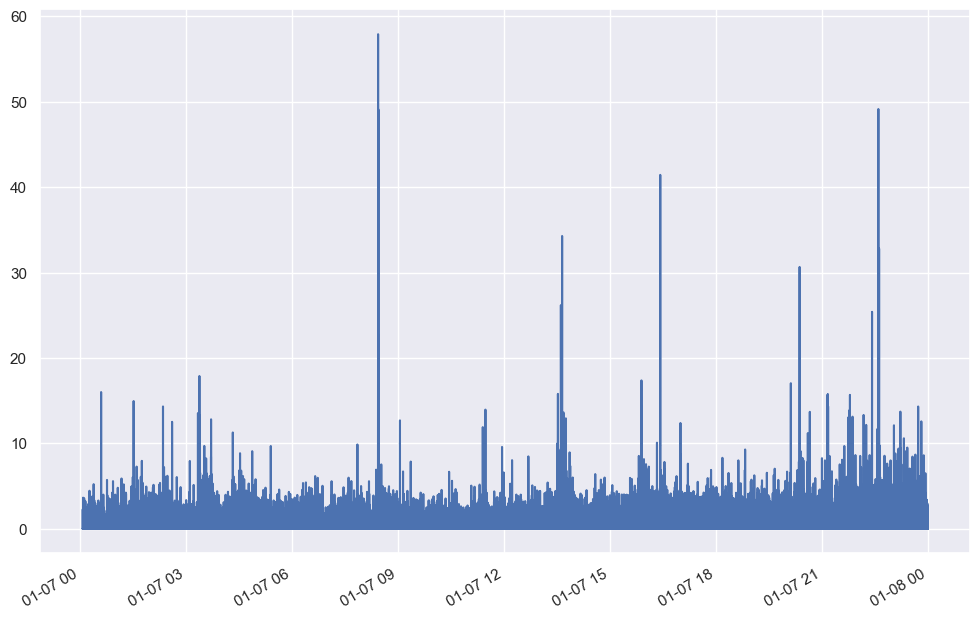

In [44]:
X_train_orthog['bid_price_9'].plot()
plt.show()

In [45]:
y_input.sum()

336470

In [46]:
# %% MDI
# This score can be obtained from tree-based classifiers and corresponds to sklearn’s feature_importances attribute. MDI uses in-sample (IS) performance to estimate feature importance.
print('MDI starting...')
base_est.fit(X_train_orthog, y_input)

mdi_feature_imp = mean_decrease_impurity(base_est, X_train_orthog.columns)
mdi_best_columns = mdi_feature_imp.sort_values(by='mean', ascending=False)[:columns_to_take_mdi].index
mdi_best_columns = list(mdi_best_columns.values)
print(mdi_best_columns)

MDI starting...
['ask_qty_0', 'bid_qty_0', 'midprice_7', 'midprice_2', 'midprice_0', 'midprice_3', 'midprice_5', 'midprice_8', 'microprice_0']


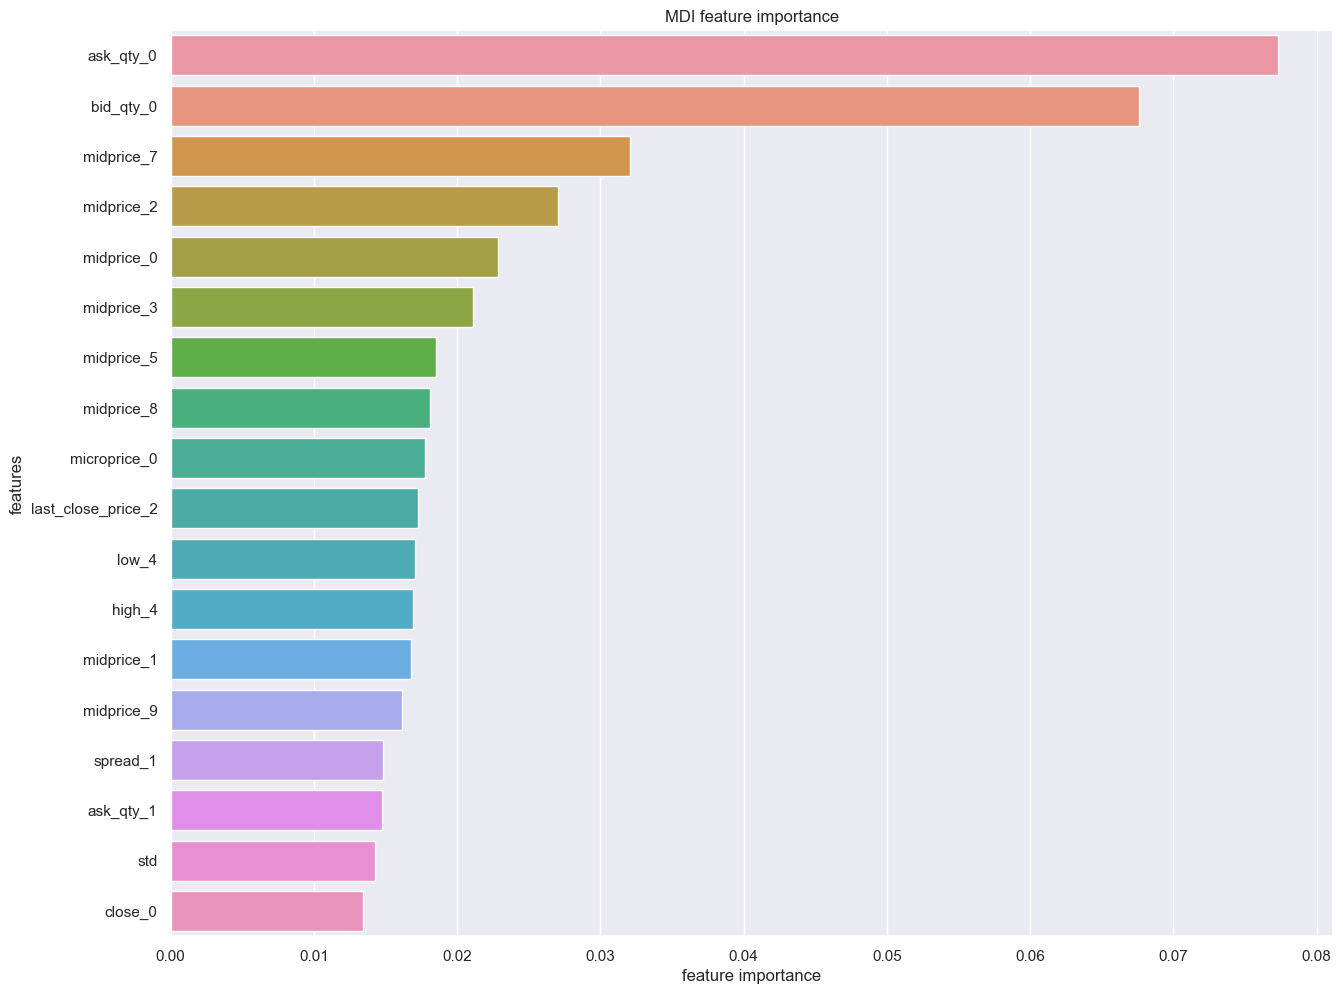

In [47]:
def plot_feature_importance(importance,names,model_type,columns_to_take):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df=fi_df.sort_values(by=['feature_importance'], ascending=False).iloc[:columns_to_take]

    #Define size of bar plot
    plt.figure(figsize=(15,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('features')
    plt.show()
    
    
plot_feature_importance(base_est.feature_importances_, X_train_orthog.columns,'MDI',columns_to_take_mdi*2)

In [48]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(base_est.estimators_[0], out_file='tree.dot', 
#                 feature_names = base_est.feature_importances_,
#                 class_names = X_train_orthog.columns,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

In [49]:
# %% MDA
# This method can be applied to any classifier, not only tree based. MDA uses out-of-sample (OOS) performance in order to estimate feature importance.
from sklearn.metrics import accuracy_score, log_loss

print('MDA starting...')
mda_feature_imp = mean_decrease_accuracy(base_est, X_train_orthog, y_input, cv_gen, scoring=log_loss)
mda_best_columns = mda_feature_imp.sort_values(by='mean', ascending=False)[:columns_to_take_mda].index
mda_best_columns = list(mda_best_columns.values)
print(mda_best_columns)


MDA starting...
['last_close_price_6', 'microprice_0', 'last_close_price_1', 'ask_qty_0', 'midprice_4', 'last_close_price_5', 'last_close_price_2', 'ask_qty_9', 'last_close_price_9']


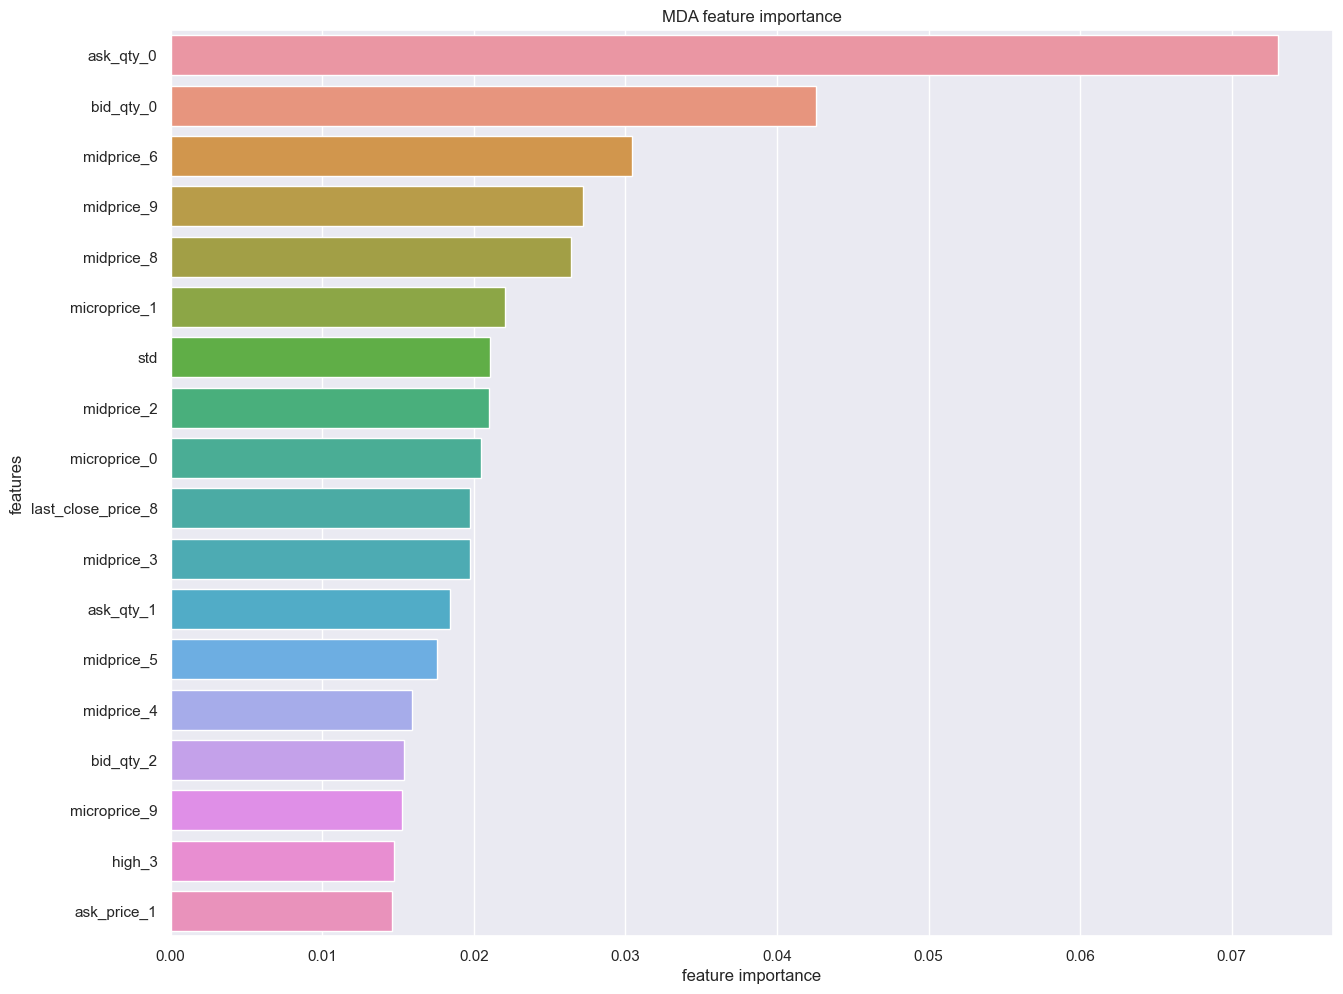

In [50]:
plot_feature_importance(base_est.feature_importances_, X_train_orthog.columns,'MDA',columns_to_take_mda*2)

In [51]:
# %% SFI
# MDA and MDI feature suffer from substitution effects. If two features are highly correlated,
# one of them will be considered as important while the other one will be redundant.
# SFI is a OOS feature importance estimator which doesn’t suffer from substitution effects because it estimates each feature importance separately.
print('SFI starting...')
sfi_feature_imp = single_feature_importance(base_est, X_train_orthog, y_input, cv_gen, scoring=accuracy_score)
sfi_best_columns = sfi_feature_imp.sort_values(by='mean', ascending=False)[:columns_to_take_sfi].index
sfi_best_columns = list(sfi_best_columns.values)
print(sfi_best_columns)

SFI starting...
['bid_qty_0', 'ask_qty_0', 'bid_price_9', 'ask_price_9', 'spread_9', 'ask_qty_6', 'microprice_9', 'bid_qty_7', 'high_1', 'microprice_6', 'spread_0', 'bid_price_0', 'ask_price_0', 'last_close_qty_0', 'microprice_5', 'spread_7', 'bid_price_7', 'ask_price_7']


In [52]:
# plot_feature_importance(base_est.feature_importances_, X_train_orthog.columns,'SFI',columns_to_take_sfi*2)

In [53]:

# selection_columns = set(private_state_columns+mda_best_columns + sfi_best_columns + mdi_best_columns)
selection_columns = set(mda_best_columns + sfi_best_columns + mdi_best_columns)
print('feature_importance_input finished to %d columns' % len(selection_columns))

feature_importance_input finished to 32 columns


In [54]:
selection_columns

{'ask_price_0',
 'ask_price_7',
 'ask_price_9',
 'ask_qty_0',
 'ask_qty_6',
 'ask_qty_9',
 'bid_price_0',
 'bid_price_7',
 'bid_price_9',
 'bid_qty_0',
 'bid_qty_7',
 'high_1',
 'last_close_price_1',
 'last_close_price_2',
 'last_close_price_5',
 'last_close_price_6',
 'last_close_price_9',
 'last_close_qty_0',
 'microprice_0',
 'microprice_5',
 'microprice_6',
 'microprice_9',
 'midprice_0',
 'midprice_2',
 'midprice_3',
 'midprice_4',
 'midprice_5',
 'midprice_7',
 'midprice_8',
 'spread_0',
 'spread_7',
 'spread_9'}

In [55]:
len(selection_columns)

32

In [56]:
# dill.dump_session(session_filename)